
# 퍼셉트론
퍼셉트론은 1957년 코넬 항공 연구소의 프랑크 로젠블라트가 만든 **이진 분류** 문제에서 최적의 가중치를 학습하는 알고리즘입니다.

<img src='https://starcell.github.io/img/blog/perceptron.png' style='margin: 0 auto;'>

퍼셉트론은 선형회귀와 굉장히 유사한 모양을 가지고 있습니다.

$$ z = \sum^{n}_{i=1}{w_ix_i} + b $$
선형 함수를 통과한 후 만들어진 $z$를 **임계 함수**에 통과시켜 임계값보다 크면 1, 작으면 -1로 만듭니다. 그래프가 계단처럼 생겼기 때문에 계단함수 라고 부르기도 합니다.

$$ \hat{y} = \begin{cases} 1 \text{ }\text{ }\text{ }\text{ }\text{ }\text{ }(z > 0) \\ -1 \text{ }\text{ }\text{ }(z \leq 0) \end{cases} $$

# 아달린
퍼셉트론이 등장한 후 1960년에 스탠포드대의 버나드 위드로우가 적응형 선형 뉴런 아달린을 만들었습니다. 아달린은 선형 함수의 결과 $z$를 학습에 사용하고 임계 함수의 결과 $\hat{y}$는 결과 산출에만 이용합니다.

<img src='https://blog.kakaocdn.net/dn/utqll/btqLZKKin9u/Lh60cOqiZb1iqCN1yJHsNk/img.png' style='margin: 0 auto;'>


# 로지스틱 회귀
로지스틱 회귀는 아달린에서 발전한 형태를 가지고 있습니다. 로지스틱 회귀는 선형 함수를 통해 얻은 $z$를 임계 함수에 보내기 전 활성화 함수를 거쳐 $a$로 변형합니다. 아달린과 동일한 방식이지만, 활성화 함수가 비선형이라는 점에서 차이가 있습니다.

# 활성화 함수
로지스틱 회귀에서는 시그모이드 함수 중 **로지스틱 함수**를 활성화 함수로 사용합니다. 시그모이드 함수는 정의역이 $(-\infty, \infty)$, 치역이 $(0, 1)$이고 $\lim_{x\to-\infty}f(x)=0$, $\lim_{x\to\infty}f(x)=1$인 함수입니다. 로지스틱 함수는 `오즈 비` > `로짓 함수` > `로지스틱 함수`의 순서로 수식을 변형해 만들어집니다. 로지스틱 함수를 통과한 값인 $a$는 0~1 사이의 값을 가지기 때문에 분류의 확률로 활용됩니다.

# 로지스틱 함수 유도
## 오즈 비
오즈 비는 성공확률과 실패 확률의 비율을 나타내는 값입니다.
$$ OR(\text{odds ratio}) = \frac{p}{1-p} $$


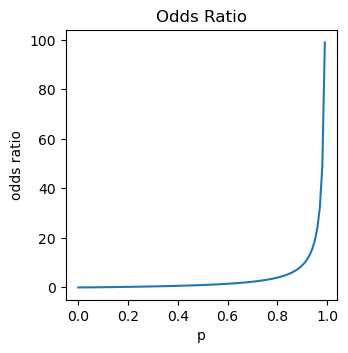

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def odds_ratio(p):
    return p / (1 - p)

x = np.arange(0, 1, 0.01)
y = odds_ratio(x)

plt.figure(figsize=(3.5, 3.5))
plt.title("Odds Ratio")
plt.xlabel('p')
plt.ylabel('odds ratio')
plt.plot(x, y)
plt.show()

## 로짓 함수

로짓함수는 오즈 비에 자연로그를 취한 함수입니다.
$$ \text{logit}(p) = \ln{\frac{p}{1 - p}} $$

/tmp/ipykernel_20/1213908758.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(p / (1 - p))


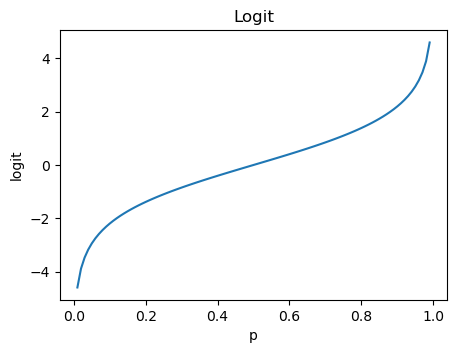

In [2]:
def logit(p):
    return np.log(p / (1 - p))

x = np.arange(0, 1, 0.01)
y = logit(x)

plt.figure(figsize=(5, 3.5))
plt.title("Logit")
plt.xlabel('p')
plt.ylabel('logit')
plt.plot(x, y)
plt.show()

## 로지스틱 함수
로짓 함수의 값을 $z$라고 하면 아래와 같습니다.

$$ z = \ln{\frac{p}{1-p}} $$

이 식을 $p$에 대해서 정리해 로지스틱 함수를 얻습니다.

$$ z = \ln{\frac{p}{1-p}} $$

$$ e^z = \frac{p}{1-p} $$

$$ p = e^z - e^zp $$

$$ p(1 + e^z) = e^z $$

$$ p = \frac{e^z}{1+e^z} = \frac{1}{1+e^{-z}} $$

**로짓 함수의 역함수**입니다.

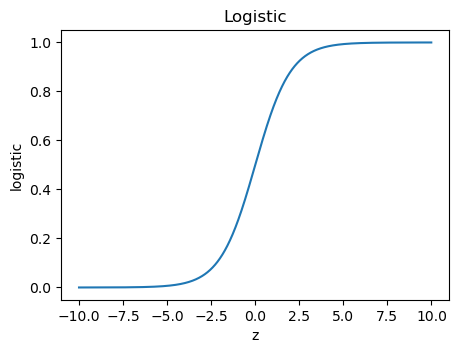

In [3]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-10, 10, 0.01)
y = logistic(x)

plt.figure(figsize=(5, 3.5))
plt.title("Logistic")
plt.xlabel('z')
plt.ylabel('logistic')
plt.plot(x, y)
plt.show()

# 시그모이드 함수 정리
많은 값들이 담겨있는 벡터 $\textbf{x}$에 대한 가중치 $\textbf{w}$와 편항치 $b$를 이용해 선형 함수를 거쳐 $z$값을 계산합니다. $z$는 $(-\infty, \infty)$에서 존재합니다. 로지스틱 회귀의 목적은 이진 분류이기 때문에 $z$값을 $[0, 1]$의 $a$값으로 바꾸게 되고 이때 이 $a$를 확률처럼 쓸 수 있습니다. 최종적으로 임계값이 $0.5$인 계단 함수를 거쳐 $0$또는 $1$의 값을 가지는 $\hat{y}$를 구하는 것이 로지스틱 회귀의 목적입니다.

# 로지스틱 손실 함수
손실 함수는 모델을 통해 실제로 얻은 결과와 얻기를 기대한 값의 차이를 나타내는 함수입니다. 다양한 범위의 값을 예측하는 회귀 알고리즘의 경우 단순히 $y - \hat{y}$이 오차가 되지만 0, 1을 판단하는 분류 함수의 경우 저런 방식으로 오차를 계산할 수 없습니다. 그래서 특별한 로지스틱 손실 함수를 사용하게 됩니다.

$$ L = -\{y\ln{a} + (1 - y)\ln{(1-a)}\} $$

살짝 복잡해 보이지만 예측 해야 하는 target인 $y$는 0또는 1의 값을 가지므로 식이 단순해집니다.

$$ L = \begin{cases} -\ln{a} \qquad (y = 1) \\ -\ln{(1-a)} \quad (y = 0) \end{cases} $$

**손실함수 $L$의 값을 가장 작게 만드는 $a$값**을 찾아내는 것이 목표입니다. $L$의 값이 가장 작아지려면 $a$의 값이 결국 $y$와 같으면 된다는 것을 알 수 있습니다.

# 로지스틱 손실 함수 미분
사실 사람이 보기에 $a$값을 $y$값에 가장 가깝게 만들면 끝나는 일이지만, $a$값은 $w$와 $b$값으로 만들어 지기 때문에 $w_i$와 $b$를 적절히 조절해서 가장 가깝게 만드는 것이 중요합니다. 이때 사용하는 것이 **경사하강법**입니다. 경사하강법은 $L$의 그래프 위에 구슬을 올려두면 경사를 따라서 값이 가장 작은 극소에서 멈추게 되는 것과 동일한 원리를 이용합니다. $L$의 기울기가 양수라면 구슬은 왼쪽으로 이동하고 기울기가 음수라면 오른쪽으로 굴러떨어집니다. 또, 기울기가 가파를수록 이동하는 속도(거리)는 길어집니다. 동일한 원리로 $w_i$나 $b$에 대한 $L$의 기울기가 양수라면 값을 줄이고 음수라면 값을 키웁니다. 또, 기울기의 크기가 클수록 크게 움직여야 하므로 **기울기를 뺀 값으로 수정**하면 된다는 것을 알 수 있습니다.

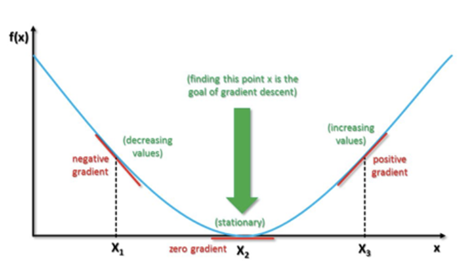

또, $L$값은 $a$로 표현되긴 했지만 $a$는 또 다시 시그모이드 함수로 표현되고 시그모이드 함수는 또 다시 $w_i$와 $b$를 가지는 선형 함수로 표현되기 때문에 음함수입니다($x_i$는 변수가 아닙니다). 그래서 특정 변수에 대해서만 $L$의 기울기를 알아야 하기 때문에 편미분으로 진행하게 됩니다.

또, 손실 함수를 바로 $w_i$나 $b$에 대해 미분하면 굉장히 복잡해지기 때문에 여러 단계를 거쳐서 미분하는편이 좋습니다.



# 복잡한 합성함수의 미분

복잡한 로지스틱 손실 함수를 미분하기 위해 아래를 이용합니다.

$$ y = f(g(x)) $$
$$ u = g(x) $$
$$ y = f(u) $$

$$ \frac{d{y}}{d{x}} = \frac{d{y}}{d{u}} \frac{d{u}}{d{x}} $$

# 로지스틱 손실 함수의 미분

손실함수 $L$은 $a$를 변수로 갖고 $a$는 $z$를 변수로 갖고 $z$는 $w_i$와 $b$를 변수로 갖습니다. $w_i$와 $b$에 대해 $L$을 미분하는 것이 목표입니다.

따라서 각각 $a$, $z$, $w_i$와 $b$에 대해서 미분합니다.

$$ \frac{d{L}}{d{a}} = \frac{d}{d{a}}\{-(y\ln{a} + (1-y)\ln{(1-a)}\} = -\left(\frac{y}{a} - \frac{1-y}{1-a}\right)$$

$$ \frac{da}{dz} = \frac{d}{dz}\frac{1}{1+e^{-z}} = \frac{e^{-z}}{(1+e^{-z})^2}$$
$$ = \frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}} = \frac{1}{1+e^{-z}}\left(1 - \frac{1}{1+e^{-z}} \right) $$
$$ = a(1-a) $$

$$ \frac{\partial{z}}{\partial{w_i}} = x_i $$






$$ \frac{\partial{L}}{\partial{w_i}} = \frac{dL}{da}\frac{da}{dz}\frac{\partial{z}}{\partial{w_i}} $$
$$ = -\left(\frac{y}{a} - \frac{1-y}{1-a}\right)a(1-a)x_i $$
$$ = -(y-ya-a+ya)x_i $$
$$ = -(y-a)x_i$$

앞에서 경사하강법을 통해 **가중치에 미분값을 빼서 업데이트**한다고 했으니 아래와 같습니다.

$$ w_i := w_i + (y-a)x_i $$

마찬가지로 $b$에 대해서도 적용하면

$$ \frac{\partial{L}}{\partial{b}} = -(y-a)\frac{\partial}{\partial{b}}\left(b + \sum^{n}_{i=1}{w_ix_i}\right) $$
$$ = -(y-a)1 $$

$$ b := b + (y-a)1 $$

# 실전활용 - 1

## 데이터 준비
유명한 위스콘신 데이터 세트를 이용해 로지스틱 회귀를 해보겠습니다.


In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(569, 30) (569,)


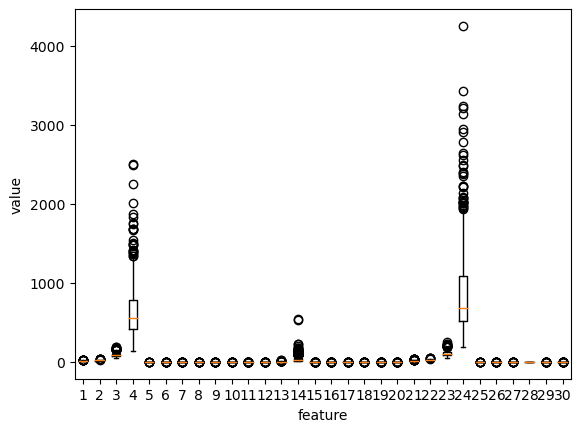

In [5]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

위의 boxplot을 보면 4, 14, 24번 데이터의 범위가 넓은 것을 확인할 수 있습니다.

In [6]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

이 모델의 목적은 데이터를 이용해 종양이 양성인지 음성인지를 판단하는 것이기 때문에 target에는 0과 1만이 들어 있습니다.

In [7]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

## 로지스틱 회귀

In [8]:
x = cancer.data
y = cancer.target

값들을 훈련 데이터와 학습 데이터로 분류하겠습니다.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

랜덤하게 분류를 하지만 $y$값의 비율 자체가 다르기 때문에 아무렇게나 나누면 데이터가 편향될 수 있습니다. 그래서 `stratify`옵션을 통해 $y$값의 비율을 양쪽 모두 같게 분리합니다.

학습을 위한 로지스틱 회귀 뉴런을 구현합니다.

In [10]:
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        
        return w_grad, b_grad
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad
    
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        
        return a > 0.5

위의 내용을 바탕으로 만들어진 로지스틱 회귀 뉴런을 통해 학습을 진행해 보겠습니다.

In [11]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

/tmp/ipykernel_20/1295205119.py:31: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

맞춘것은 1, 못맞춘것은 0으로 계산되니 전체 $n$개의 데이터 중 $x$개의 데이터를 맞췄다고 하면 위 식의 값은
$ \frac{x}{n} $
이 되고 따라서 정확도를 의미합니다. 따라서 정확도가 82%인 로지스틱 모델을 만들었다고 할 수 있습니다.

# 단일층 신경망
실제 인공지능 모델은 여러개의 층이 합쳐서 복잡한 형태를 가지고 있습니다. 이미 위에서 만든 로지스틱 회귀 뉴런 하나로도 단일층 신경망의 역할을 수행할 수 있습니다. 단일층 신경망을 만들며 추가적인 기능을 구현해보겠습니다.

In [12]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        
        return w_grad, b_grad
    
    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
    
                a = np.clip(a, 1e-10, 1 - 1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
            self.losses.append(loss / len(y))
        
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

동일하게 단일층 신경망을 통해 학습시킵니다.

In [13]:
layer = SingleLayer()

layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.6491228070175439

정확도가 상당히 올라갔습니다. 이번의 단일 신경망에서는 훈련 세트를 무작위로 섞어 과대적합을 피했기 때문입니다.

손실이 줄어드는 과정을 살펴보겠습니다.

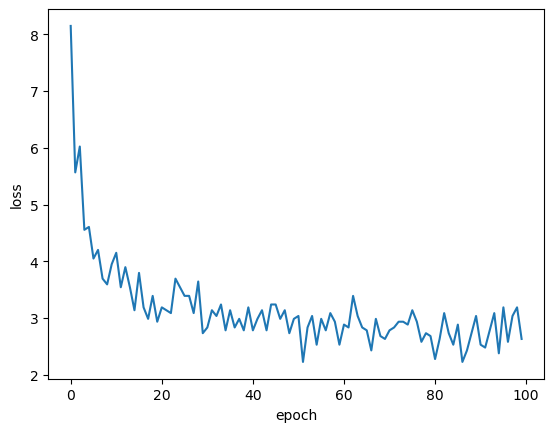

In [14]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 실전활용 - 2

OASIS라고 부르는 과학 발전을 위해 공개적으로 뇌 MRI데이터를 제공하는 프로젝트의 데이터를 이용해 치매에 걸렸는지 판단해보는 모델을 만들어보겠습니다.

# 데이터 살펴보기

In [15]:
df = pd.read_csv('/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


`Subject ID`와 `MRI ID`는 메타데이터입니다. `SES`에 결측치가 있습니다. SES는 사회적 지위를 의미하는 값이므로 중앙값으로 넣어서 해결하겠습니다. `object`값들은 원-핫 인코딩을 통해 처리하겠습니다.

In [17]:
df = df.drop(['Subject ID', 'MRI ID', 'Visit', 'Hand'], axis=1) 
df['M/F'] = df['M/F'].replace(['F','M'], [1,0])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    int64  
 1   MR Delay  373 non-null    int64  
 2   M/F       373 non-null    int64  
 3   Age       373 non-null    int64  
 4   EDUC      373 non-null    int64  
 5   SES       354 non-null    float64
 6   MMSE      371 non-null    float64
 7   CDR       373 non-null    float64
 8   eTIV      373 non-null    int64  
 9   nWBV      373 non-null    float64
 10  ASF       373 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 32.2 KB


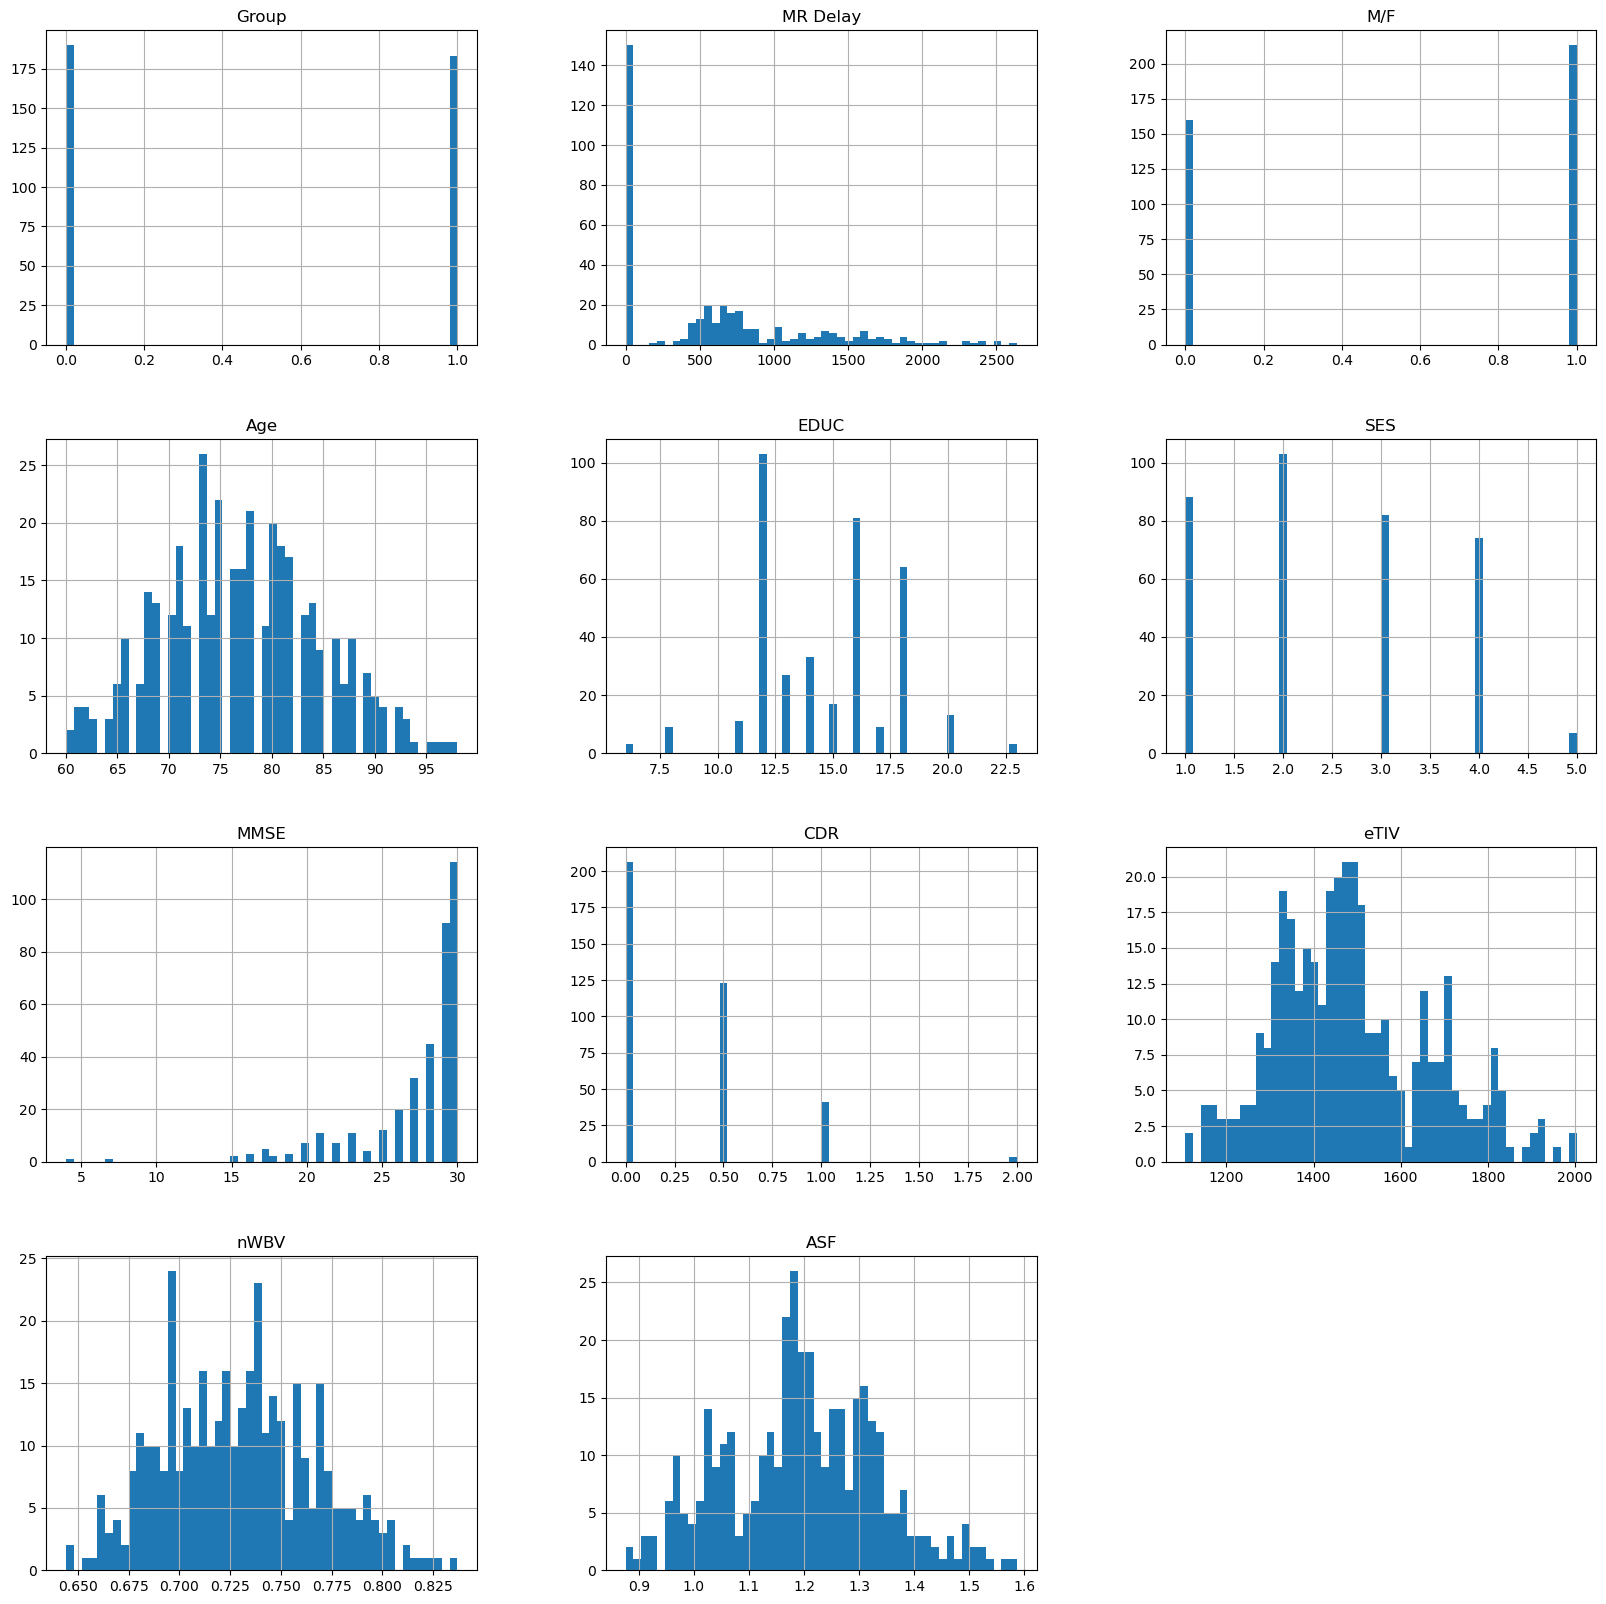

In [19]:
df.hist(bins=50, figsize=(20,20))
plt.show()

결측치와 데이터의 스케일을 맞춥니다.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])

y = df['Group'].values
x = df.drop('Group', axis = 1)

x = pipeline.fit_transform(x)

print(x.shape, y.shape)

(373, 10) (373,)


In [21]:
x

array([[-0.93771494, -1.15379808,  1.30873772, ...,  2.83605891,
        -0.90516867, -2.2657425 ],
       [-0.21761337, -1.15379808,  1.43978716, ...,  2.93270307,
        -1.30964265, -2.31650145],
       [-0.93771494, -1.15379808, -0.26385558, ...,  1.07940909,
         0.17342861, -1.08378418],
       ...,
       [-0.93771494,  0.86670278, -2.09854775, ..., -0.96148827,
         1.92614919,  0.98283006],
       [ 0.2645553 ,  0.86670278, -1.83644887, ..., -0.91600866,
         1.79132453,  0.92481984],
       [ 1.59603414,  0.86670278, -1.57434999, ..., -0.88189896,
         1.92614919,  0.88131217]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

298 298
75 75


In [23]:
layer = SingleLayer()

layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9466666666666667

In [24]:
x_sample = x[10:15]
y_sample = y[10:15]

print('label:', y_sample)
print('pred:', layer.predict(x_sample))

label: [1 1 1 0 0]
pred: [ True  True  True False False]


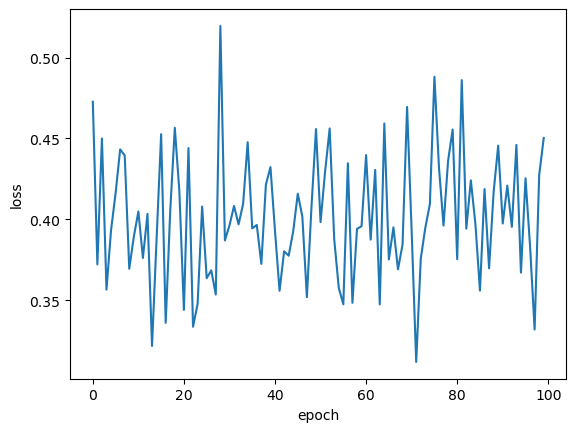

In [25]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

acc: 0.9466666666666667
pre: 0.9714285714285714
rec: 0.918918918918919
f1 : 0.9444444444444445


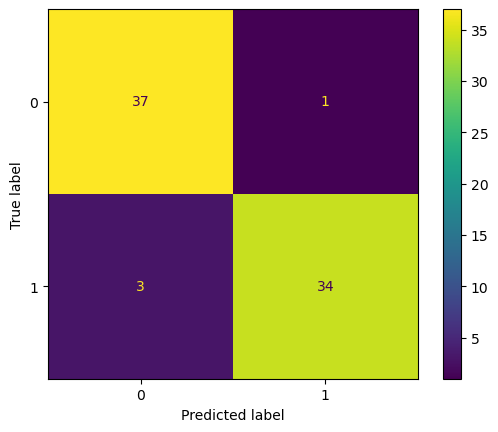

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pred = layer.predict(x_test)

accuracy = accuracy_score(y_test, pred) # (tp + tn) / (p + n)
precision = precision_score(y_test,pred) # tp / (tp + fp)
recall = recall_score(y_test,pred) # tp / (tp + fn)
f1 = f1_score(y_test,pred) # 2tp / (2tp + fp + fn)
cm = confusion_matrix(y_test,pred)

print('acc:', accuracy)
print('pre:', precision)
print('rec:', recall)
print('f1 :', f1)

ConfusionMatrixDisplay(cm).plot()
plt.show()

정확도가 꽤 높은 모델을 만들었습니다

# 요약
미적분의 개념을 이용해 로지스틱 회귀에 대한 탐구를 진행하고 로지스틱 회귀를 이용해 MRI데이터로 알츠하이머에 걸렸는지 판단하는 모델을 만들었다. 복잡한 합성함수로 이루어져 있는 로지스틱 손실 함수를 미분하기 위해 미적분의 음함수의 미분법을 응용해 미분하는 방법을 설명했다. 경사하강법을 이용해 모델을 학습하고 알츠하이머를 진단하는 로지스틱 회귀 모델을 만들었다.